En este segundo notebook lo que queremos hacer es profundizar en las columnas que hemos elegido, eliminando todos los los valores nulos. También queremos explorar las columnas que contienen diccionarios y por ultimo eliminar si tenemos valores duplicados en nuestros datos.

In [1]:
import pandas as pd
import ast

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("../data/working_data/idealista_data_cleaned_1.csv")
df

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,longitude,status,newDevelopment,parkingSpace,priceByArea,floor,hasLift
0,985000,chalet,sale,245.0,4.0,3.0,Málaga,Este,Parque Clavero,36.726046,-4.392859,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",4020.0,NaN,NaN
1,265000,flat,sale,66.0,2.0,1.0,Málaga,Carretera de Cádiz,Huelin,36.703176,-4.438555,good,False,NaN,4015.0,8,1.0
2,275000,flat,sale,82.0,2.0,2.0,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,-4.414621,good,False,NaN,3354.0,1,1.0
3,1600000,flat,sale,174.0,3.0,2.0,Málaga,Este,Malagueta - Monte Sancha,36.721393,-4.405125,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",9195.0,1,1.0
4,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.720695,-4.421476,good,False,NaN,3846.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,9000,garage,sale,NaN,NaN,NaN,Mijas,Sitio de Calahonda,Sitio de Calahonda,36.508218,-4.725346,NaN,False,NaN,300.0,st,1.0
8088,22000,garage,sale,NaN,NaN,NaN,Benalmádena,Parque de la Paloma,NaN,36.590990,-4.535055,NaN,False,NaN,815.0,bj,0.0
8089,8000,garage,sale,NaN,NaN,NaN,Torremolinos,Centro,Manantiales - Estación de Autobuses,36.631383,-4.502652,NaN,False,NaN,276.0,st,0.0
8090,9900,garage,sale,NaN,NaN,NaN,Benalmádena,Torrequebrada,Zona Centro Comercial Torrequebrada,36.581868,-4.551639,NaN,False,NaN,381.0,st,1.0


In [4]:
df["num_columnas_nulas"] = df.isna().sum(axis=1)
df

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,longitude,status,newDevelopment,parkingSpace,priceByArea,floor,hasLift,num_columnas_nulas
0,985000,chalet,sale,245.0,4.0,3.0,Málaga,Este,Parque Clavero,36.726046,-4.392859,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",4020.0,NaN,NaN,2
1,265000,flat,sale,66.0,2.0,1.0,Málaga,Carretera de Cádiz,Huelin,36.703176,-4.438555,good,False,NaN,4015.0,8,1.0,1
2,275000,flat,sale,82.0,2.0,2.0,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,-4.414621,good,False,NaN,3354.0,1,1.0,1
3,1600000,flat,sale,174.0,3.0,2.0,Málaga,Este,Malagueta - Monte Sancha,36.721393,-4.405125,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",9195.0,1,1.0,0
4,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.720695,-4.421476,good,False,NaN,3846.0,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,9000,garage,sale,NaN,NaN,NaN,Mijas,Sitio de Calahonda,Sitio de Calahonda,36.508218,-4.725346,NaN,False,NaN,300.0,st,1.0,5
8088,22000,garage,sale,NaN,NaN,NaN,Benalmádena,Parque de la Paloma,NaN,36.590990,-4.535055,NaN,False,NaN,815.0,bj,0.0,6
8089,8000,garage,sale,NaN,NaN,NaN,Torremolinos,Centro,Manantiales - Estación de Autobuses,36.631383,-4.502652,NaN,False,NaN,276.0,st,0.0,5
8090,9900,garage,sale,NaN,NaN,NaN,Benalmádena,Torrequebrada,Zona Centro Comercial Torrequebrada,36.581868,-4.551639,NaN,False,NaN,381.0,st,1.0,5


In [5]:
(df["num_columnas_nulas"] > 8).sum()

np.int64(5)

In [6]:
df = df.drop(columns=["num_columnas_nulas"])

No hay demasiadas filas que tengan demasiados valores nulos

Todos los datos están bastantes completos 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8092 non-null   int64  
 1   propertyType    8092 non-null   object 
 2   operation       8092 non-null   object 
 3   size            7434 non-null   float64
 4   rooms           5350 non-null   float64
 5   bathrooms       7434 non-null   float64
 6   municipality    8092 non-null   object 
 7   district        7950 non-null   object 
 8   neighborhood    5927 non-null   object 
 9   latitude        8092 non-null   float64
 10  longitude       8092 non-null   float64
 11  status          7407 non-null   object 
 12  newDevelopment  8092 non-null   bool   
 13  parkingSpace    4000 non-null   object 
 14  priceByArea     7962 non-null   float64
 15  floor           5462 non-null   object 
 16  hasLift         4816 non-null   float64
dtypes: bool(1), float64(7), int64(1),

Lo primero que vamos que vamos a hacer es rellenar todos los valores vacios que tenemos para distrito y neughborhood, para ello usaremos la libreria geopy.

In [8]:
df[["municipality","district","neighborhood", "latitude","longitude"]].head()

,municipality,district,neighborhood,latitude,longitude
0,Málaga,Este,Parque Clavero,36.726046,-4.392859
1,Málaga,Carretera de Cádiz,Huelin,36.703176,-4.438555
2,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,-4.414621
3,Málaga,Este,Malagueta - Monte Sancha,36.721393,-4.405125
4,Málaga,Centro,Centro Histórico,36.720695,-4.421476


In [9]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
from functools import partial

geolocator = Nominatim(user_agent="malaga-geocoder")

reverse = partial(geolocator.reverse, language="es")
direction = reverse("36.726046, -4.392859")
print(direction)
print(direction.raw["address"]["neighbourhood"])
print(direction.raw["address"]["borough"])
print(reverse("36.703176, -4.438555"))
print(reverse("36.731530, -4.414621"))
print(reverse("36.721393, -4.405125"))
print(reverse("36.720695, -4.421476"))

Calle Sibelius, Santa Paula Miramar, Este, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29061, España
Santa Paula Miramar
Este
13, Calle Lasso de la Vega, Huelin, Carretera de Cádiz, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29002, España
1, Calle Rodrigo de Ulloa, Olletas, Centro, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29013, España
Paseo de Sancha, La Caleta, Centro, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29016, España
2, Calle San Pastor, Centro Histórico, Centro, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29015, España


He hecho esta pequeña prueba a ver como funciona y va bastante bien, el tercer elemento que muestra es el distrito y el cuarto el barrio, asi que tengo que hacer el codigo para automatizar esto. Voy a hacer por separado si tengo que modificar los distritos y los barrios.

In [10]:
df_ = df.copy()

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# === 1. Cargar tus datos (con latitud/longitud) ===
# Asegúrate de que el DataFrame tenga columnas: latitude, longitude

# Crear geometría tipo Point para cada fila
geometry = [Point(xy) for xy in zip(df_['longitude'], df_['latitude'])]

# Convertir a GeoDataFrame con sistema de coordenadas (CRS) WGS84 (EPSG:4326)
gdf = gpd.GeoDataFrame(df_, geometry=geometry, crs="EPSG:4326")

# === 2. Cargar los polígonos de distritos y barrios ===
distritos = gpd.read_file("../data/cartografiaDistritoMunicipal-4326.geojson").to_crs("EPSG:4326")
barrios = gpd.read_file("../data/cartografiaBarrio-4326.geojson").to_crs("EPSG:4326")

print("Columnas de distritos:", distritos.columns)
print("Columnas de barrios:", barrios.columns)

Columnas de distritos: Index(['id', 'ID_DISMUNI', 'NUMERO', 'NOMBRE', 'geometry'], dtype='object')
Columnas de barrios: Index(['id', 'ID_BARRIO', 'NUMBARRIO', 'NOMBARRIO', 'NOMCOMUNBAR', 'geometry'], dtype='object')


In [11]:
# === 3. Hacer unión espacial: encontrar en qué polígono cae cada punto ===
gdf = gpd.sjoin(gdf, distritos[['geometry', 'NOMBRE']], how="left", predicate="within")
gdf = gdf.rename(columns={"NOMBRE": "district"})

gdf = gdf.drop(columns="index_right")

gdf = gpd.sjoin(gdf, barrios[['geometry', 'NOMBARRIO']], how="left", predicate="within")
gdf = gdf.rename(columns={"NOMBARRIO": "neighborhood"})

# === 4. Guardar el resultado ===
gdf[['latitude', 'longitude', 'district', 'neighborhood']].to_csv("../data/datos_con_distritos.csv", index=False)


In [12]:
datos = pd.read_csv("../data/datos_con_distritos.csv")
datos['district'] = datos['district'].fillna(datos['district.1'])
datos['neighborhood'] = datos['neighborhood'].fillna(datos['neighborhood.1'])
datos

,latitude,longitude,district,district.1,neighborhood,neighborhood.1
0,36.726046,-4.392859,Este,ESTE,Parque Clavero,PARQUE CLAVERO
1,36.703176,-4.438555,Carretera de Cádiz,CARRETERA DE CADIZ,Huelin,HUELIN
2,36.731530,-4.414621,Centro,CENTRO,Olletas - Sierra Blanquilla,OLLETAS
3,36.721393,-4.405125,Este,CENTRO,Malagueta - Monte Sancha,LA CALETA
4,36.720695,-4.421476,Centro,CENTRO,Centro Histórico,CENTRO HISTORICO
...,...,...,...,...,...,...
8087,36.508218,-4.725346,Sitio de Calahonda,NaN,Sitio de Calahonda,NaN
8088,36.590990,-4.535055,Parque de la Paloma,NaN,NaN,NaN
8089,36.631383,-4.502652,Centro,NaN,Manantiales - Estación de Autobuses,NaN
8090,36.581868,-4.551639,Torrequebrada,NaN,Zona Centro Comercial Torrequebrada,NaN


In [13]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from functools import partial
from tqdm import tqdm
import pandas as pd
import time

geolocator = Nominatim(user_agent="malaga-geocoder")
reverse = partial(geolocator.reverse, language="es")

for index, row in tqdm(df.iterrows(), total=len(df)):
    try:
        if pd.isna(row["district"]) or pd.isna(row["neighborhood"]):
            location = reverse(f"{row['latitude']}, {row['longitude']}")
            address = location.raw.get("address", {})

            if pd.isna(row["district"]):
                district = address.get("borough") or address.get("suburb") or address.get("city_district") or address.get("municipality") or address.get("town") or address.get("village")
                if district:
                    df.at[index, "district"] = district

            if pd.isna(row["neighborhood"]):
                neighborhood = address.get("neighbourhood") or address.get("quarter") or address.get("hamlet") or address.get("residential") or address.get("locality")
                if neighborhood:
                    df.at[index, "neighborhood"] = neighborhood

            time.sleep(0.5)

    except (GeocoderTimedOut, GeocoderServiceError, Exception) as e:
        print(f"Error en fila {index}: {e}")
        continue

100%|██████████| 8092/8092 [36:27<00:00,  3.70it/s]  


In [14]:
faltantes_por_municipio = df.groupby('municipality').agg({
    'district': lambda x: x.isna().sum(),
    'neighborhood': lambda x: x.isna().sum()
}).rename(columns={
    'district': 'distritos_vacios',
    'neighborhood': 'barrios_vacios'
}).sort_values(by='distritos_vacios', ascending=False)

print(faltantes_por_municipio)

                             distritos_vacios  barrios_vacios
municipality                                                 
Alcaucín                                    0               0
Algarrobo-Costa                             0               0
Alhaurín de la Torre                        0              77
Alhaurín el Grande                          0              25
Almayate Bajo                               0               4
Almogía                                     0               1
Almáchar                                    0               2
Alora                                       0               3
Antequera                                   0             100
Archidona                                   0               4
Arriate                                     0               1
Benahavís                                   0              16
Benajarafe                                  0               0
Benalmádena                                 0             249
Caleta d

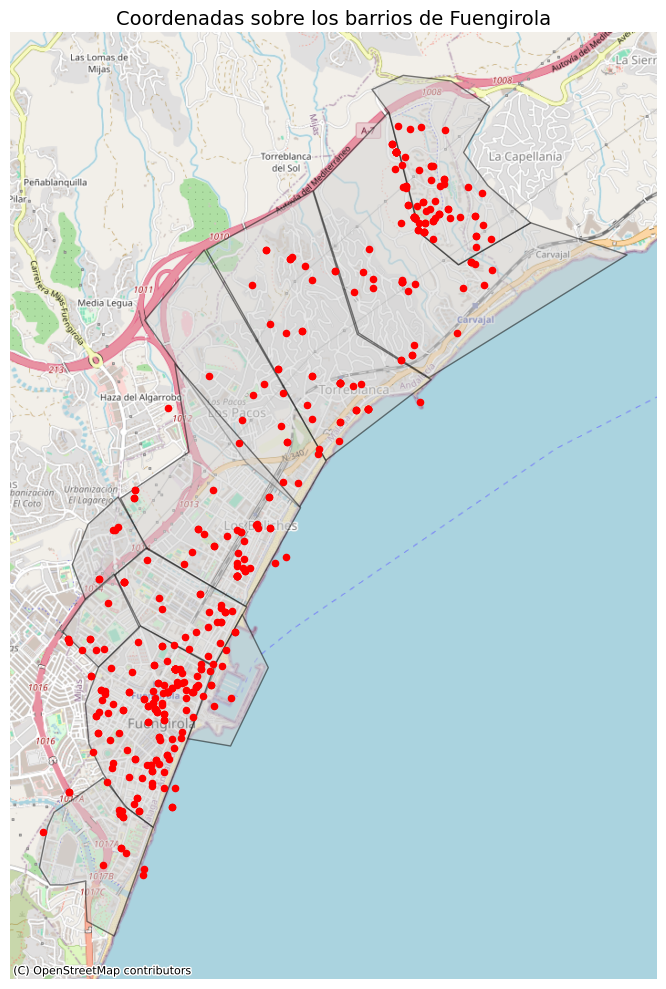

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

df_fuengirola = df[df['municipality'] == 'Fuengirola'].copy()

# Cargar GeoJSON de barrios
barrios = gpd.read_file("../data/fuengirola_barrios.geojson").to_crs(epsg=3857)  # Web Mercator

# Simular tu DataFrame con coordenadas (reemplaza esto por tus datos)
# df = pd.DataFrame({'lat': [36.54, 36.535], 'lon': [-4.62, -4.615]})
df_fuengirola['geometry'] = df_fuengirola.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_points = gpd.GeoDataFrame(df_fuengirola, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Barrios de fondo
barrios.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1, alpha=0.5)

# Tus puntos en rojo
gdf_points.plot(ax=ax, color='red', markersize=20)

# Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar vista al contenido
ax.set_axis_off()
plt.title("Coordenadas sobre los barrios de Fuengirola", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
df_fuengirola['district'].value_counts()

district
Zona Puerto Deportivo    129
El Higuerón               94
Centro Ciudad             54
Playa de los Boliches     33
Torreblanca del Sol       30
Las Gaviotas              30
Zona Sohail               19
Los Boliches              16
Los Pacos                  9
Name: count, dtype: int64

Como se ve más arriba hay muchos datos de los barrios que faltan para muchas de las ciudades. Lo primero que pense fue en buscar algún geojson primero para Fuengirola que es la ciudad que yo mejor me ocnozco ya que es donde vivo. No encontre tal archivo y una solución que vi posible es crear mi propio archivo geojson dibujando los poligonos que delimitan los distintos barrios haciendo uso de la herramienta de geojso.io. Intenté así rellenar los datos, pero no salió en un primer momento, pero me di cuenta de algo leyendo en mayor profundidad los datos, y al leer los nombres de los distritos que apenas falta, estaban los nombres de los barrios, es decir, para los municipios que son de tamaño mediano, los distritos son los barrios. Por lo que para estos municipios, los que tengan los valores de los barrios vacios vamos a ponerlos iguales que los de los distritos.

Antequera, Alhaurín el Grande, Alhaurín de la Torre, Benahavís, Benalmádena, Casares, Mijas, Fuengirola, Estepona, Cártama, Manilva, Ronda, Rincón de la Victoria, Nerja, Ojén, Torrox, Torremolinos, Torre del Mar, Velez-Málaga.

Las unicas ciudades que tienen todos los valores completos son Málaga y Marbella.

In [17]:
# Si neighborhood es NaN o cadena vacía, reemplazarlo por el valor de 'distrito'
df['neighborhood'] = df['neighborhood'].where(df['neighborhood'].notna() & (df['neighborhood'] != ''), df['district'])


In [18]:
faltantes_por_municipio = df.groupby('municipality').agg({
    'district': lambda x: x.isna().sum(),
    'neighborhood': lambda x: x.isna().sum()
}).rename(columns={
    'district': 'distritos_vacios',
    'neighborhood': 'barrios_vacios'
}).sort_values(by='distritos_vacios', ascending=False)

print(faltantes_por_municipio)

                             distritos_vacios  barrios_vacios
municipality                                                 
Alcaucín                                    0               0
Algarrobo-Costa                             0               0
Alhaurín de la Torre                        0               0
Alhaurín el Grande                          0               0
Almayate Bajo                               0               0
Almogía                                     0               0
Almáchar                                    0               0
Alora                                       0               0
Antequera                                   0               0
Archidona                                   0               0
Arriate                                     0               0
Benahavís                                   0               0
Benajarafe                                  0               0
Benalmádena                                 0               0
Caleta d

Veamos mas detenidamente los datos para los minicipios que tienen tanto los distritos como los barrios vacíos. Vamos a hacer un dataframe que tenga solo estos municipios y gracias a la extensión de data wrangler vamos a poder ver los datos en una mayor profundidad de una forma mas secilla.

In [19]:
# Lista de municipios que quieres seleccionar
municipios_seleccionados = [
    "Coin", "Caleta de Velez", "Benajarafe", "Almayate Bajo", "Frigiliana",
    "Competa", "Alora", "Monda", "Archidona", "Algarrobo-Costa", "Periana",
    "Alcaucín", "Villanueva de Algaidas", "Arriate", "Colmenar", "Istan",
    "Mezquitilla", "Canillas de Aceituno", "Chilches", "Canillas de Albaida",
    "Almáchar", "Teba", "Mollina", "Villanueva de la Concepcion", "Humilladero",
    "Yunquera", "Riogordo", "Cortes de la Frontera", "Campillos",
    "Casarabonela", "Almogía", "Cutar", "Tolox"
]

# Filtrar el DataFrame original
df_municipios_seleccionados = df[df['municipality'].isin(municipios_seleccionados)].copy()

df_municipios_seleccionados

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,longitude,status,newDevelopment,parkingSpace,priceByArea,floor,hasLift
1613,2875000,chalet,sale,736.0,6.0,6.0,Coin,Coín,Miralmonte,36.654702,-4.723669,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",3906.0,NaN,NaN
1614,670000,chalet,sale,189.0,3.0,3.0,Almayate Bajo,Vélez-Málaga,El Capitán,36.746350,-4.115227,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",3545.0,NaN,NaN
1761,289900,flat,sale,108.0,2.0,2.0,Almayate Bajo,Valle-Niza,Valle-Niza,36.723015,-4.159834,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",2684.0,1,1.0
1824,389900,chalet,sale,141.0,4.0,2.0,Benajarafe,Vélez-Málaga,Urbanización La Esperanza,36.718669,-4.200848,good,False,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",2765.0,NaN,NaN
1929,259000,chalet,sale,101.0,3.0,2.0,Coin,Coín,Coín,36.703127,-4.738562,good,False,NaN,2564.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,800,premise,rent,172.0,NaN,1.0,Mollina,Mollina,Mollina,37.114958,-4.665557,good,False,NaN,5.0,1,NaN
7965,10000,garage,sale,NaN,NaN,NaN,Competa,Cómpeta,Cómpeta,36.832671,-3.972170,NaN,False,NaN,NaN,NaN,0.0
7978,4050,garage,sale,NaN,NaN,NaN,Periana,Periana,Periana,36.927023,-4.187312,NaN,False,NaN,193.0,NaN,1.0
7987,31500,garage,sale,NaN,NaN,NaN,Alora,Álora,Álora,36.833661,-4.705220,NaN,False,NaN,NaN,NaN,0.0


Tienen todos tanto el distrito como el barrio vacíos. En la mayoria de los casos son pueblos pequeños y se consideran un único nucleo de población. En álora y archidona si que hay mas numeros de nucleos de población. Entonces vamos a proceder asi, para Alora y archidona vamos a poner los nombres de los distritos segun el nombre del nucleo, podemos obtenener las coordenadas de los nucleos en sima y generamos un codigo que las coordenadas más cercanas a cada nucleo tomen para district y neighborhood el nombre del nucleo.

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 1. Crear GeoDataFrame con los núcleos de Álora (como puntos)
nucleos_coords = {
    "Álora": (-4.6375, 36.8360),
    "El Puente": (-4.6430, 36.8290),
    "Bellavista": (-4.6360, 36.8230),
    "Bermejo-Caracuel": (-4.6520, 36.8240),
    "La Estación": (-4.6550, 36.8350),
    "Las Mellizas": (-4.6340, 36.8380),
    "Paredones-Cerrajones": (-4.6380, 36.8400),
    "El Chorro": (-4.7790, 36.8280),
    "Los Llanos": (-4.6250, 36.8310)
}

gdf_nucleos = gpd.GeoDataFrame(
    [{'nucleo': k, 'geometry': Point(v)} for k, v in nucleos_coords.items()],
    crs="EPSG:4326"
)

# 2. Filtrar tu DataFrame para quedarte solo con Álora
df_alora = df[df['municipality'] == 'Alora'].copy()

# 3. Crear geometría a partir de las coordenadas del DataFrame
df_alora['geometry'] = df_alora.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_alora = gpd.GeoDataFrame(df_alora, geometry='geometry', crs="EPSG:4326")

# 4. Calcular el núcleo más cercano para cada punto
gdf_alora = gdf_alora.to_crs(epsg=3857)  # Pasamos a metros para distancias reales
gdf_nucleos = gdf_nucleos.to_crs(epsg=3857)

# Calcular el más cercano
def asignar_nucleo_mas_cercano(punto):
    distancias = gdf_nucleos.distance(punto)
    return gdf_nucleos.loc[distancias.idxmin(), 'nucleo']

gdf_alora['nucleo'] = gdf_alora['geometry'].apply(asignar_nucleo_mas_cercano)

# 5. Rellenar columnas
gdf_alora['district'] = gdf_alora['nucleo']
gdf_alora['neighborhood'] = gdf_alora['nucleo']

# 6. Integrar en el dataframe original
df.update(gdf_alora[['district', 'neighborhood']])


In [21]:
# Núcleos de Archidona (ejemplo)
nucleos_coords_archidona = {
    "Archidona": (-4.5745, 36.9312),
    "El Blanquillo": (-4.5760, 36.9250),
    "La Encarnación": (-4.5800, 36.9290),
    "El Cerrillo": (-4.5700, 36.9340),
    "Cuevas de Archidona": (-4.5850, 36.9360)
}

gdf_nucleos = gpd.GeoDataFrame(
    [{'nucleo': k, 'geometry': Point(v)} for k, v in nucleos_coords_archidona.items()],
    crs="EPSG:4326"
)

df_archidona = df[df['municipality'] == 'Archidona'].copy()

df_archidona['geometry'] = df_archidona.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_archidona = gpd.GeoDataFrame(df_archidona, geometry='geometry', crs="EPSG:4326")

gdf_archidona = gdf_archidona.to_crs(epsg=3857)
gdf_nucleos = gdf_nucleos.to_crs(epsg=3857)

gdf_archidona['nucleo'] = gdf_archidona['geometry'].apply(asignar_nucleo_mas_cercano)

gdf_archidona['district'] = gdf_archidona['nucleo']
gdf_archidona['neighborhood'] = gdf_archidona['nucleo']

df.update(gdf_archidona[['district', 'neighborhood']])


Para el resto de municipios vamos a poner el nombre del municipio en el distrito y el barrio

In [22]:
# Rellenar en todo df las columnas 'district' y 'neighborhood' cuando estén vacías o nulas
for col in ['district', 'neighborhood']:
    # Primero reemplazamos strings vacíos por NaN para que fillna funcione bien
    df[col].replace("", pd.NA)
    # Rellenamos NaN con el valor de 'municipality'
    df[col].fillna(df['municipality'])


Comprobamos que esten ya todos los datos rellenos

In [23]:
num_district_vacio = df['district'].isna().sum()
num_neighborhood_vacio = df['neighborhood'].isna().sum()

print(f"Número de distritos vacíos: {num_district_vacio}")
print(f"Número de barrios vacíos: {num_neighborhood_vacio}")

Número de distritos vacíos: 0
Número de barrios vacíos: 0


In [24]:
mean_sizes = df.groupby("propertyType")["size"].mean()
print(mean_sizes)

propertyType
chalet          425.423412
countryHouse    264.000000
duplex          219.712551
flat            118.977565
garage                 NaN
office          162.567742
penthouse       178.051672
premise         393.374317
studio           41.265487
Name: size, dtype: float64


In [25]:
num_garages = (df["propertyType"] == "garage").sum()
num_garages_size_null = df[(df["propertyType"] == "garage") & (df["size"].isna())].shape[0]

print("Total de garajes:", num_garages)
print("Garajes con size nulo:", num_garages_size_null)


Total de garajes: 658
Garajes con size nulo: 658


In [26]:
df.loc[df["propertyType"] == "garage", "size"] = 12.5


In [27]:
num_garages = (df["propertyType"] == "garage").sum()
num_garages_size_null = df[(df["propertyType"] == "garage") & (df["size"].isna())].shape[0]

print("Total de garajes:", num_garages)
print("Garajes con size nulo:", num_garages_size_null)

Total de garajes: 658
Garajes con size nulo: 0


In [28]:
# Rellenar los valores nulos de 'rooms' y 'bathrooms' con 0
df['rooms'] = df['rooms'].fillna(0)
df['bathrooms'] = df['bathrooms'].fillna(0)

In [29]:
df["parkingSpace"].head(20)

0     {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
1                                                                  NaN
2                                                                  NaN
3     {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
4                                                                  NaN
5                                                                  NaN
6                                                                  NaN
7                                                                  NaN
8                                                                  NaN
9     {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
10                                                                 NaN
11    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
12    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
13    {'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}
14    

In [30]:
# Convertimos los strings a diccionarios (solo si no son ya dicts)
df["parkingSpace"] = df["parkingSpace"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [31]:
df["hasParkingSpace"] = df["parkingSpace"].apply(lambda x: x["hasParkingSpace"] if pd.notna(x) else None)
df["isParkingSpaceIncludedInPrice"] = df["parkingSpace"].apply(lambda x: x.get("isParkingSpaceIncludedInPrice") if pd.notna(x) else None)

In [32]:
df = df.drop(columns=["parkingSpace"])

In [33]:
df["hasParkingSpace"] = df["hasParkingSpace"].fillna(False)
df["isParkingSpaceIncludedInPrice"] = df["isParkingSpaceIncludedInPrice"].fillna(False)

C:\Users\stefa\AppData\Local\Temp\ipykernel_21480\2686511226.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hasParkingSpace"] = df["hasParkingSpace"].fillna(False)
C:\Users\stefa\AppData\Local\Temp\ipykernel_21480\2686511226.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["isParkingSpaceIncludedInPrice"] = df["isParkingSpaceIncludedInPrice"].fillna(False)


In [34]:
df["status"] = df["status"].fillna("unknown")

In [35]:
df["floor"].unique()

array([nan, '8', '1', '3', '7', '2', '4', 'bj', '26', '6', '9', '5', '10',
       '18', '17', '16', '20', '14', '13', '23', 'en', '24', '11', '28',
       '12', '19', '27', '15', '25', '22', 'ss', '-1', 'st', '-2', 'ati'],
      dtype=object)

In [36]:
mapeo_floor = {
    "bj": 0,     # Bajo
    "en": 1.5,   # Entreplanta
    "ati": 50,  # Ático, lo voy a representar con 50 refiriendo a que siempre es lo mas alto.
    "st": -1,   # sotano
    "ss": 0.5     # sobre suelo
}

# # Aplica mapeo
df["floor"] = df["floor"].replace(mapeo_floor)
df["floor"] = df["floor"].fillna(0)
df["floor"] = pd.to_numeric(df["floor"], errors="coerce")

In [37]:
df["hasLift"] = df["hasLift"].fillna(0)

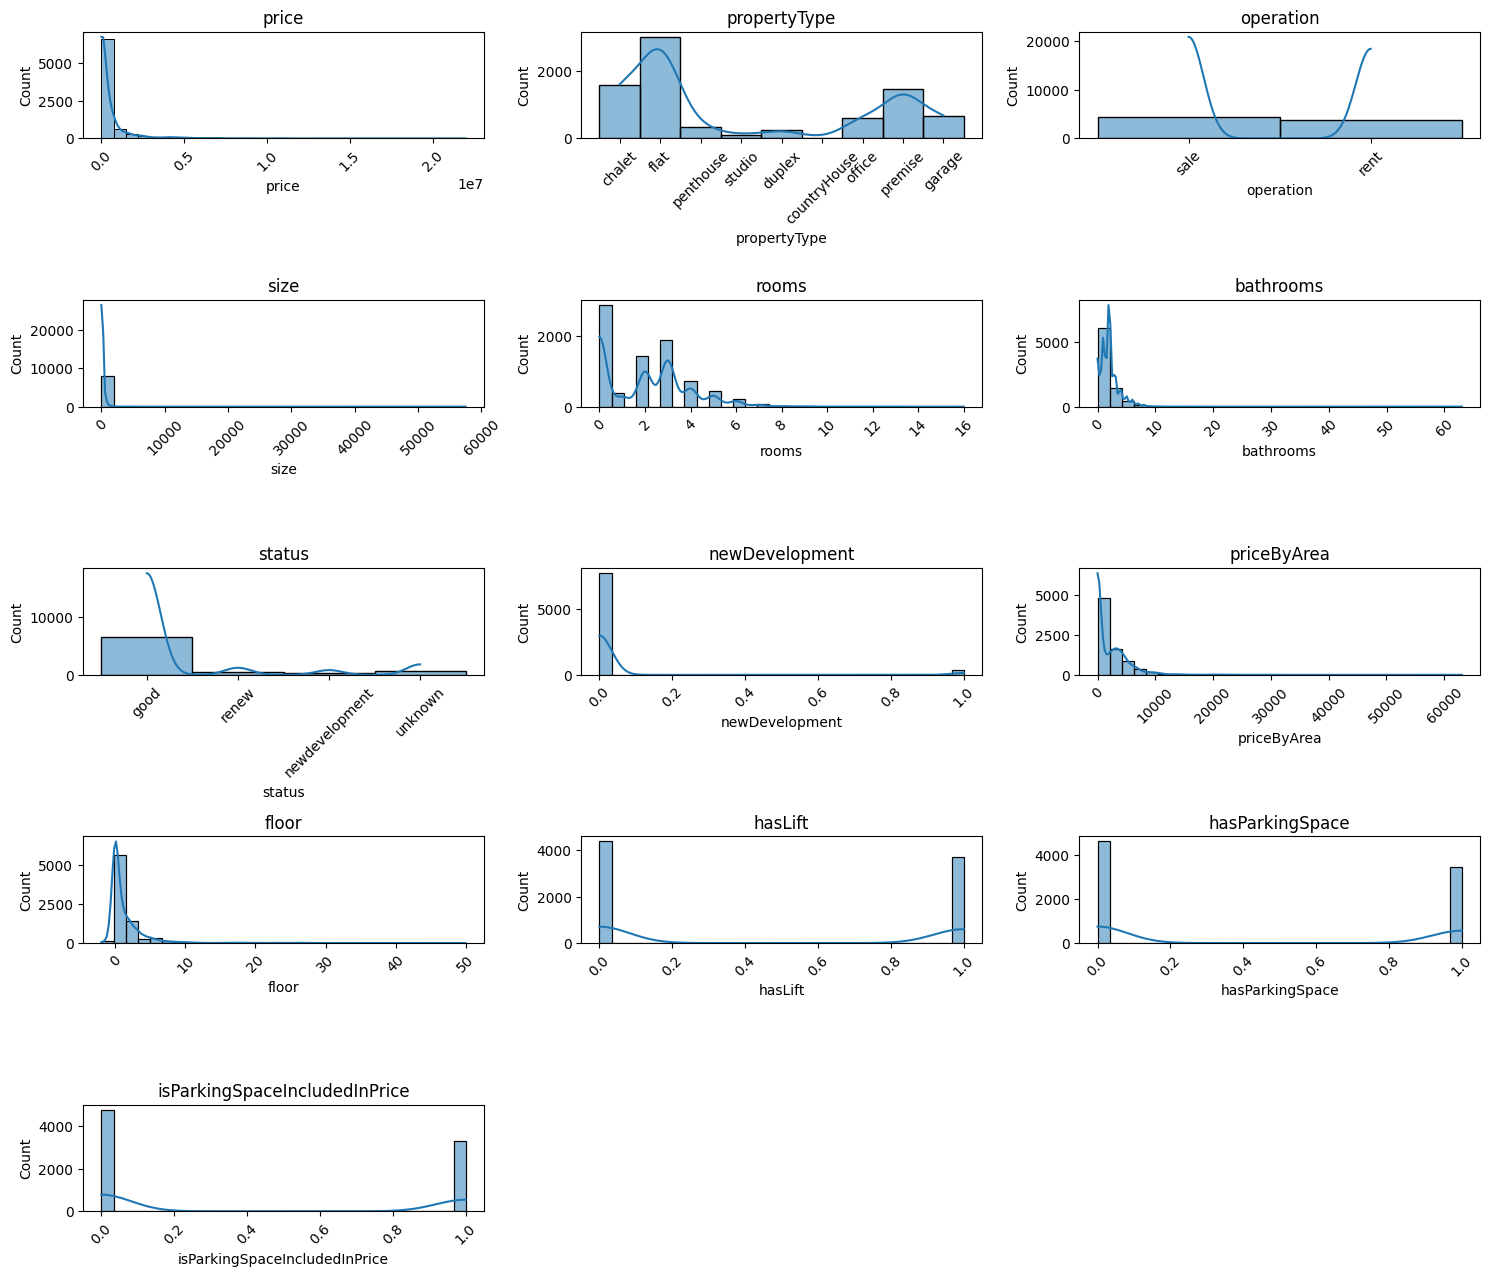

In [39]:
import seaborn as sns
df_plot = df.drop(columns = [ "municipality", "district", "neighborhood", "latitude", "longitude"])

features = df_plot.columns

plt.figure(figsize=(15,15)) 
for i, column in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(x=df[column], kde=True, bins=30)
    plt.title(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

## priceaByArea

En la grafica de arriba vemos como tenemos los valores de price by area muy agrupados, y que tenemos bastante outliers. Vamos a eliminar todo lo que este por encima de 10000
Vamos a ver de que depende price by area, si hay correlacion entre priceByArea, municipality, district, neighborhood y price. 


In [40]:
df = df[df['priceByArea'] <= 10000]
df = df[df['size'] <= 1500]  # Eliminar tamaños mayores a 500 m2

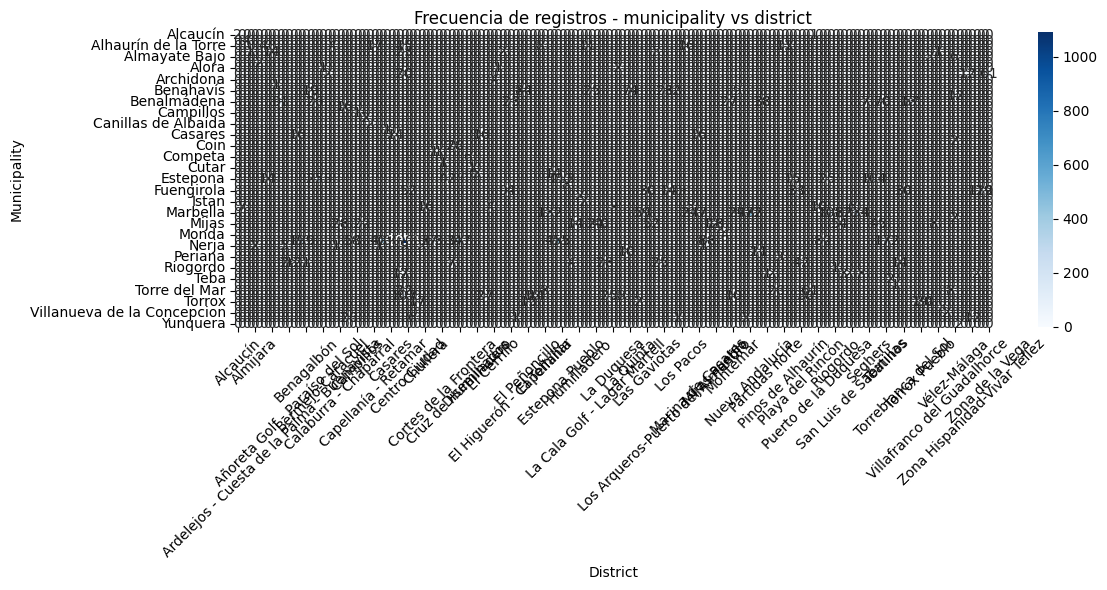

In [41]:
import seaborn as sns

tabla = pd.crosstab(df['municipality'], df['district'])

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='Blues')
plt.title("Frecuencia de registros - municipality vs district")
plt.xlabel("District")
plt.ylabel("Municipality")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

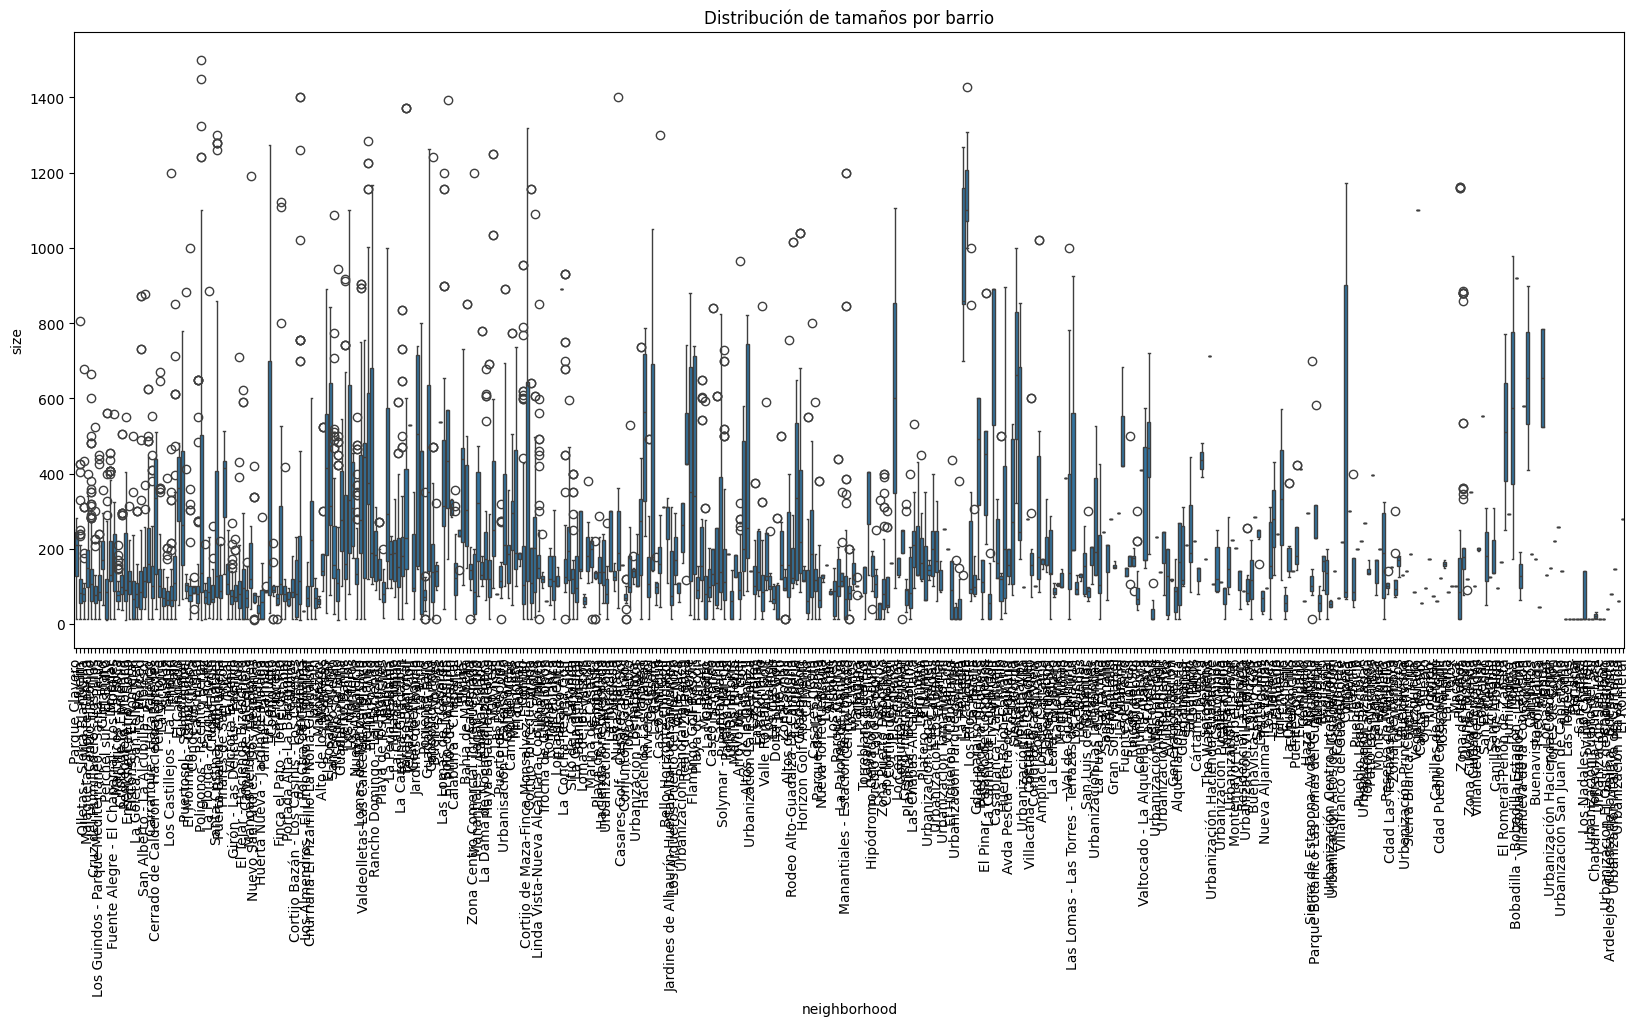

In [42]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='neighborhood', y='size')
plt.xticks(rotation=90)
plt.title("Distribución de tamaños por barrio")
plt.show()


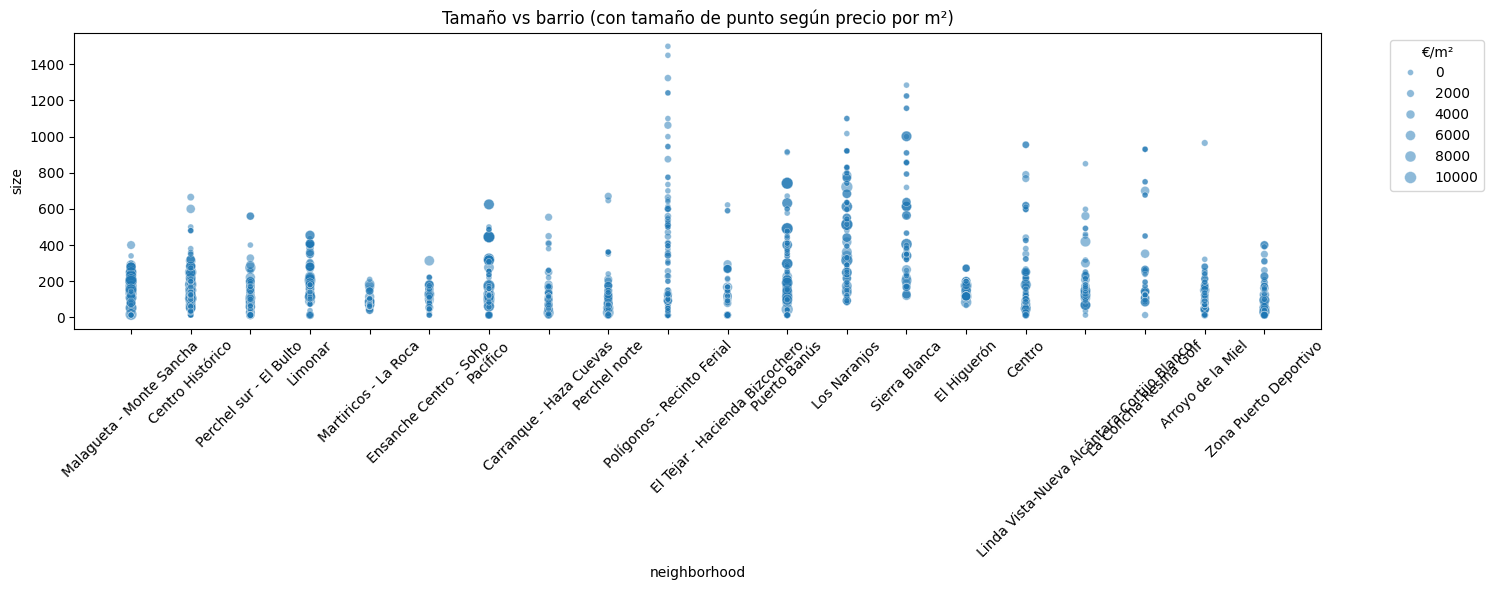

In [43]:
# Seleccionar los 20 barrios con más datos
top_neigh = df['neighborhood'].value_counts().nlargest(20).index
df_top = df[df['neighborhood'].isin(top_neigh)]

plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_top, x='neighborhood', y='size', size='priceByArea', alpha=0.5,)
plt.xticks(rotation=45)
plt.title("Tamaño vs barrio (con tamaño de punto según precio por m²)")
plt.legend(title="€/m²", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


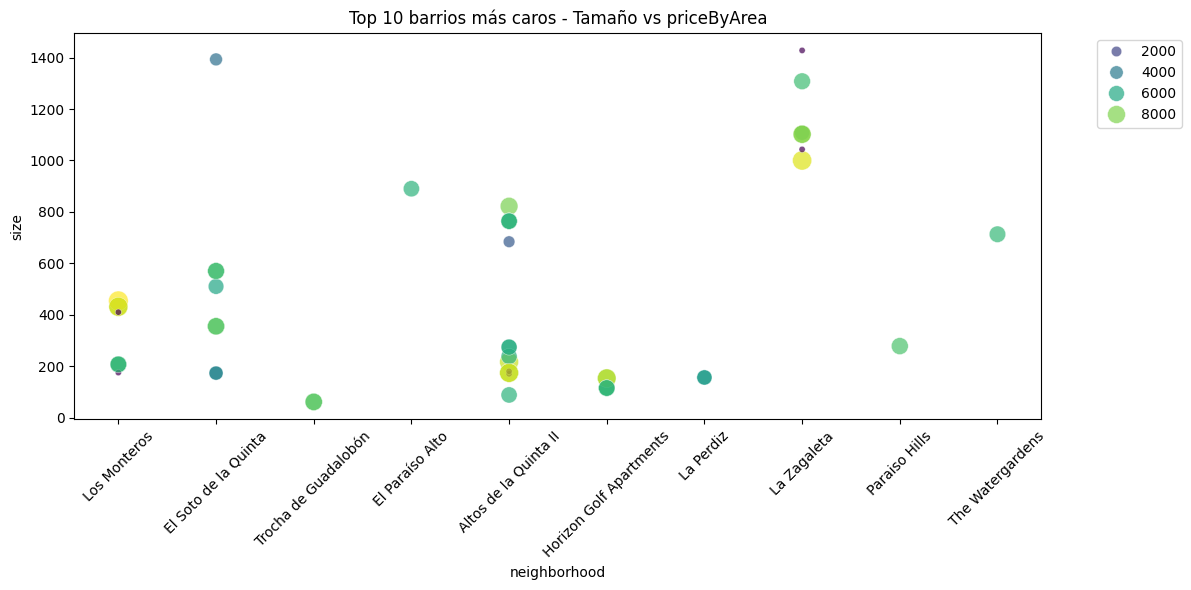

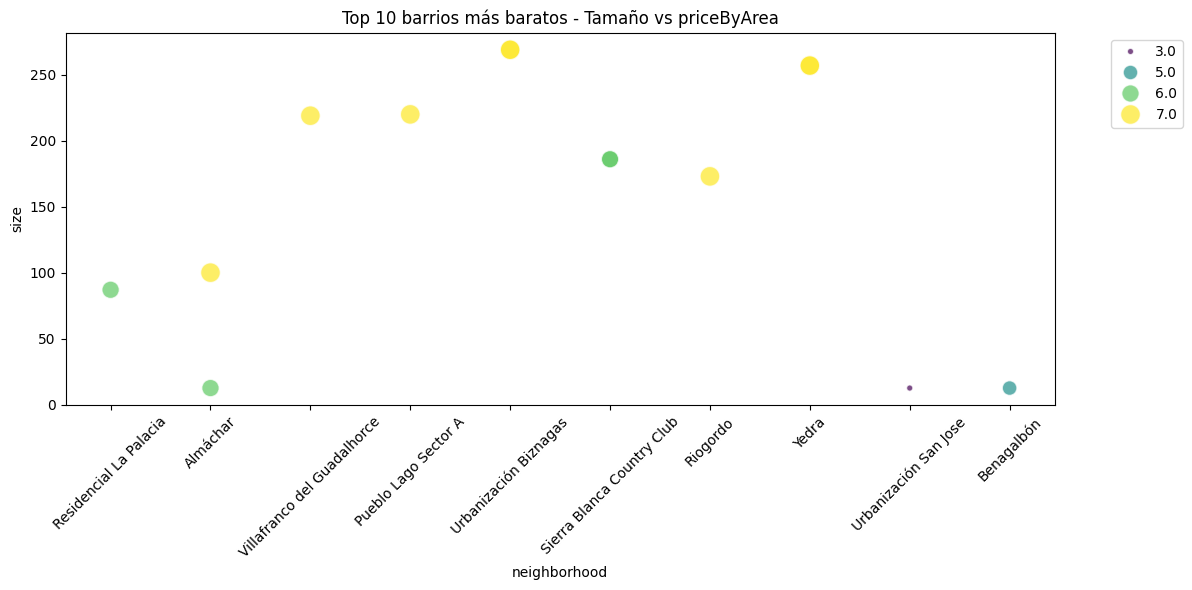

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Agrupar por neighborhood y obtener el priceByArea medio ---
neigh_avg_price = df.groupby('neighborhood')['priceByArea'].mean()

# Top 10 barrios más caros
top10_caros = neigh_avg_price.sort_values(ascending=False).head(10).index
df_top_caros = df[df['neighborhood'].isin(top10_caros)]

# Top 10 barrios más baratos
top10_baratos = neigh_avg_price.sort_values().head(10).index
df_top_baratos = df[df['neighborhood'].isin(top10_baratos)]

# --- Gráfico 1: Top 10 más caros ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_top_caros,
    x='neighborhood',
    y='size',
    size='priceByArea',
    hue='priceByArea',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Top 10 barrios más caros - Tamaño vs priceByArea")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Gráfico 2: Top 10 más baratos ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_top_baratos,
    x='neighborhood',
    y='size',
    size='priceByArea',
    hue='priceByArea',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Top 10 barrios más baratos - Tamaño vs priceByArea")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7698 entries, 0 to 8091
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          7698 non-null   int64  
 1   propertyType                   7698 non-null   object 
 2   operation                      7698 non-null   object 
 3   size                           7698 non-null   float64
 4   rooms                          7698 non-null   float64
 5   bathrooms                      7698 non-null   float64
 6   municipality                   7698 non-null   object 
 7   district                       7698 non-null   object 
 8   neighborhood                   7698 non-null   object 
 9   latitude                       7698 non-null   float64
 10  longitude                      7698 non-null   float64
 11  status                         7698 non-null   object 
 12  newDevelopment                 7698 non-null   bool  

In [46]:
df = df.drop_duplicates()

Genial, ya tenemos los datos bastante limpios, nos queda ver como trabajar con los datos de floor.

In [47]:
df.head(20)

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,longitude,status,newDevelopment,priceByArea,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice
0,985000,chalet,sale,245.0,4.0,3.0,Málaga,Este,Parque Clavero,36.726046,-4.392859,good,False,4020.0,0.0,0.0,True,True
1,265000,flat,sale,66.0,2.0,1.0,Málaga,Carretera de Cádiz,Huelin,36.703176,-4.438555,good,False,4015.0,8.0,1.0,False,False
2,275000,flat,sale,82.0,2.0,2.0,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,-4.414621,good,False,3354.0,1.0,1.0,False,False
3,1600000,flat,sale,174.0,3.0,2.0,Málaga,Este,Malagueta - Monte Sancha,36.721393,-4.405125,good,False,9195.0,1.0,1.0,True,True
4,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.720695,-4.421476,good,False,3846.0,3.0,0.0,False,False
5,339900,flat,sale,120.0,5.0,1.0,Málaga,Cruz de Humilladero,Cruz del Humilladero - Los Tilos,36.711503,-4.438170,good,False,2833.0,7.0,1.0,False,False
6,350000,flat,sale,91.0,3.0,2.0,Málaga,Carretera de Cádiz,Los Guindos - Parque Mediterráneo - Santa Paula,36.693284,-4.446240,good,False,3846.0,2.0,1.0,False,False
7,545000,flat,sale,145.0,5.0,2.0,Málaga,Centro,Gibralfaro,36.727350,-4.409431,good,False,3759.0,8.0,1.0,False,False
8,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.723110,-4.422928,good,False,3846.0,3.0,0.0,False,False
9,950000,penthouse,sale,200.0,3.0,2.0,Málaga,Centro,Perchel sur - El Bulto,36.716861,-4.433021,good,False,4750.0,4.0,1.0,True,True


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5812 entries, 0 to 8091
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          5812 non-null   int64  
 1   propertyType                   5812 non-null   object 
 2   operation                      5812 non-null   object 
 3   size                           5812 non-null   float64
 4   rooms                          5812 non-null   float64
 5   bathrooms                      5812 non-null   float64
 6   municipality                   5812 non-null   object 
 7   district                       5812 non-null   object 
 8   neighborhood                   5812 non-null   object 
 9   latitude                       5812 non-null   float64
 10  longitude                      5812 non-null   float64
 11  status                         5812 non-null   object 
 12  newDevelopment                 5812 non-null   bool  

In [49]:
# Calculo el precio por metro cuadrado
df['real_price_by_m2'] = df['price'] / df['size']

# Calculamos la diferencia entre el precio por metro cuadrado y el rpiceByArea
df['diff_real_vs_reported'] = df['priceByArea'] - df['real_price_by_m2']

# Ahora calculamos la media por barrio del precio por metro cuadrado
df['avg_price_by_area_neigh'] = df.groupby('neighborhood')['priceByArea'].transform('mean')

#Por ultimo vemos la diferencia entre el precio promedio por barrio y el priceByArea
df['diff_vs_neigh_avg'] = df['priceByArea'] - df['avg_price_by_area_neigh']



In [50]:
df

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,...,newDevelopment,priceByArea,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,real_price_by_m2,diff_real_vs_reported,avg_price_by_area_neigh,diff_vs_neigh_avg
0,985000,chalet,sale,245.0,4.0,3.0,Málaga,Este,Parque Clavero,36.726046,...,False,4020.0,0.0,0.0,True,True,4020.408163,-0.408163,3630.444444,389.555556
1,265000,flat,sale,66.0,2.0,1.0,Málaga,Carretera de Cádiz,Huelin,36.703176,...,False,4015.0,8.0,1.0,False,False,4015.151515,-0.151515,1072.436364,2942.563636
2,275000,flat,sale,82.0,2.0,2.0,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,...,False,3354.0,1.0,1.0,False,False,3353.658537,0.341463,1597.750000,1756.250000
3,1600000,flat,sale,174.0,3.0,2.0,Málaga,Este,Malagueta - Monte Sancha,36.721393,...,False,9195.0,1.0,1.0,True,True,9195.402299,-0.402299,4100.476190,5094.523810
4,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.720695,...,False,3846.0,3.0,0.0,False,False,3846.153846,-0.153846,1395.755474,2450.244526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,9000,garage,sale,12.5,0.0,0.0,Mijas,Sitio de Calahonda,Sitio de Calahonda,36.508218,...,False,300.0,-1.0,1.0,False,False,720.000000,-420.000000,1762.656250,-1462.656250
8088,22000,garage,sale,12.5,0.0,0.0,Benalmádena,Parque de la Paloma,Parque de la Paloma,36.590990,...,False,815.0,0.0,0.0,False,False,1760.000000,-945.000000,1505.724138,-690.724138
8089,8000,garage,sale,12.5,0.0,0.0,Torremolinos,Centro,Manantiales - Estación de Autobuses,36.631383,...,False,276.0,-1.0,0.0,False,False,640.000000,-364.000000,1141.548387,-865.548387
8090,9900,garage,sale,12.5,0.0,0.0,Benalmádena,Torrequebrada,Zona Centro Comercial Torrequebrada,36.581868,...,False,381.0,-1.0,1.0,False,False,792.000000,-411.000000,1096.785714,-715.785714


In [51]:
df['diff_real_vs_reported'].mean()

np.float64(-52.878940294744325)

Se ve directamente que la columna de priceByArea lo que esta es calculada como price/size y no se ve que tenga relacion con el neighborhood.
Vamos a ver si mejoramos los resultados si comparamos tambien con el tipo de propiedad.

In [52]:

df['avg_price_area_by_type_size_neigh'] = df.groupby(
    ['operation', 'propertyType', 'size', 'neighborhood'], observed=True
)['priceByArea'].transform('mean')

df['diff_vs_avg_by_type_size_neigh'] = df['priceByArea'] - df['avg_price_area_by_type_size_neigh']


In [53]:
df

,price,propertyType,operation,size,rooms,bathrooms,municipality,district,neighborhood,latitude,...,floor,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,real_price_by_m2,diff_real_vs_reported,avg_price_by_area_neigh,diff_vs_neigh_avg,avg_price_area_by_type_size_neigh,diff_vs_avg_by_type_size_neigh
0,985000,chalet,sale,245.0,4.0,3.0,Málaga,Este,Parque Clavero,36.726046,...,0.0,0.0,True,True,4020.408163,-0.408163,3630.444444,389.555556,4020.000000,0.000000
1,265000,flat,sale,66.0,2.0,1.0,Málaga,Carretera de Cádiz,Huelin,36.703176,...,8.0,1.0,False,False,4015.151515,-0.151515,1072.436364,2942.563636,4015.000000,0.000000
2,275000,flat,sale,82.0,2.0,2.0,Málaga,Centro,Olletas - Sierra Blanquilla,36.731530,...,1.0,1.0,False,False,3353.658537,0.341463,1597.750000,1756.250000,3354.000000,0.000000
3,1600000,flat,sale,174.0,3.0,2.0,Málaga,Este,Malagueta - Monte Sancha,36.721393,...,1.0,1.0,True,True,9195.402299,-0.402299,4100.476190,5094.523810,8764.000000,431.000000
4,550000,flat,sale,143.0,3.0,2.0,Málaga,Centro,Centro Histórico,36.720695,...,3.0,0.0,False,False,3846.153846,-0.153846,1395.755474,2450.244526,3846.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,9000,garage,sale,12.5,0.0,0.0,Mijas,Sitio de Calahonda,Sitio de Calahonda,36.508218,...,-1.0,1.0,False,False,720.000000,-420.000000,1762.656250,-1462.656250,405.000000,-105.000000
8088,22000,garage,sale,12.5,0.0,0.0,Benalmádena,Parque de la Paloma,Parque de la Paloma,36.590990,...,0.0,0.0,False,False,1760.000000,-945.000000,1505.724138,-690.724138,1574.000000,-759.000000
8089,8000,garage,sale,12.5,0.0,0.0,Torremolinos,Centro,Manantiales - Estación de Autobuses,36.631383,...,-1.0,0.0,False,False,640.000000,-364.000000,1141.548387,-865.548387,1137.333333,-861.333333
8090,9900,garage,sale,12.5,0.0,0.0,Benalmádena,Torrequebrada,Zona Centro Comercial Torrequebrada,36.581868,...,-1.0,1.0,False,False,792.000000,-411.000000,1096.785714,-715.785714,428.500000,-47.500000


In [54]:
# Filtro: valores cuya diferencia está entre -50 y 50
ajustados = df[
    df['diff_vs_avg_by_type_size_neigh'].between(-50, 50)
]

# Porcentaje sobre el total
porcentaje = len(ajustados) / len(df) * 100

print(f"{porcentaje:.2f}% de los registros tienen un precio por m² ajustado (entre -50 y 50 €)")


92.84% de los registros tienen un precio por m² ajustado (entre -50 y 50 €)


In [55]:
df['priceByArea'] = df['priceByArea'].fillna(df['avg_price_area_by_type_size_neigh'])

df = df.drop(columns=['avg_price_area_by_type_size_neigh', 'diff_vs_avg_by_type_size_neigh', 'real_price_by_m2', 'diff_real_vs_reported', 'avg_price_by_area_neigh', 'diff_vs_neigh_avg'])


In [1]:
df

NameError: name 'df' is not defined

In [56]:
# Guardamos el dataframe
df.to_csv("../data/working_data/idealista_data_cleaned_20250729.csv", index=False)

In [57]:
# Separamos alquiler y venta
df_rental = df[df["operation"]=='rent']
df_rental.to_csv("../data/working_data/idealista_data_rental_categorical.csv", index=False)
df_sales = df[df["operation"]=='sale']
df_sales.to_csv("../data/working_data/idealista_data_sales_categorical.csv", index=False)